In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('data/game/box_raw/reshaped_regular_season_games.csv')

In [21]:
df['PACE'] = 100 *df['PTS'] / df['ORTG']
df = df.round(3)
df.to_csv('data/game/box_raw/reshaped_regular_season_games.csv', index=False)

In [11]:
year_df = df[df['SEASON'] == '2023-24']

In [17]:
def check_seasonal_correlation(df: pd.DataFrame, stat_1: str, stat_2: str):
    season_stats = df.groupby('SEASON').agg({
        stat_1: 'mean',
        stat_2: 'mean'
    }).reset_index()

    correlation = season_stats[stat_1].corr(season_stats[stat_2])

    print("Correlation between league-wide points and defensive rebounds:")
    print(f"r = {correlation:.3f}")

    plt.figure(figsize=(10,6))
    plt.scatter(season_stats[stat_1], season_stats[stat_2])
    plt.xlabel(stat_1)
    plt.ylabel(stat_2)
    plt.title(f'{stat_1} vs {stat_2} Across Time')

    for i, team in enumerate(season_stats['SEASON']):
        plt.annotate(team, 
                    (season_stats[stat_1].iloc[i], season_stats[stat_2].iloc[i]),
                    xytext=(5,5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

    return correlation

Correlation between league-wide points and defensive rebounds:
r = 0.872


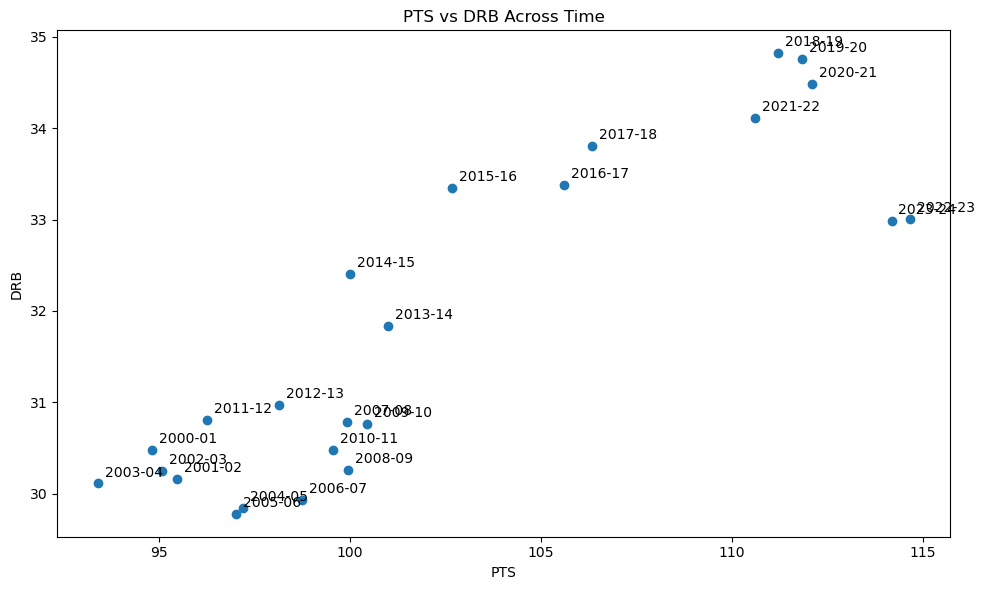

0.871669458330944

In [19]:
check_seasonal_correlation(df, 'PTS', 'DRB')